###Nama      : Aprillia Nur Azizah 
###Unsername : aprillianuraz
###Email     : aprilliaazizah3@gmail.com

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd 
import os
import re
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import os
import nltk
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/Dicoding/Dataset/fake_or_real_news.csv')
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.shape

(6335, 3)

In [ ]:
label = {"FAKE":0, "REAL":1}
df['label'] = df['label'].map(label)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [ ]:
#remove duplicates
df.drop_duplicates(keep='first', inplace=True)
df.shape

(6306, 3)

In [ ]:
#Check Missing Value 
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
#remove title colunm 
df.drop(labels=['title'], axis=1, inplace=True)
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


In [ ]:
#change text to lower case 
for text in df:
   df['text'] = [entry.lower() for entry in df['text']]
df.head()

,text,label
0,"daniel greenfield, a shillman journalism fello...",0
1,google pinterest digg linkedin reddit stumbleu...,0
2,u.s. secretary of state john f. kerry said mon...,1
3,"— kaydee king (@kaydeeking) november 9, 2016 t...",0
4,it's primary day in new york and front-runners...,1


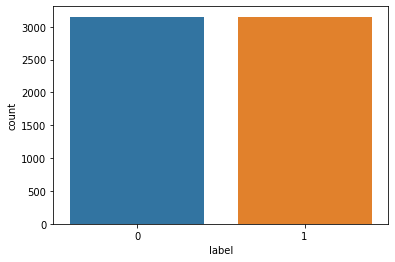

In [ ]:
sns.countplot(x='label', data=df)

In [ ]:
#text cleaning 
def clean_text(txt):

    contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                        "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is",
                        "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                        "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
                        "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                        "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have",
                        "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                        "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                        "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                        "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                        "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": 
                        "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": 
                        "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": 
                        "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": 
                        "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": 
                        "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": 
                        "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": 
                        "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    def _get_contractions(contraction_dict):
        contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
        return contraction_dict, contraction_re

    def replace_contractions(text):
        contractions, contractions_re = _get_contractions(contraction_dict)
        def replace(match):
            return contractions[match.group(0)]
        return contractions_re.sub(replace, text)

    #replace contractions
    txt = replace_contractions(txt)
    
    #remove punctuations
    txt  = "".join([char for char in txt if char not in string.punctuation])
    txt = re.sub('[0-9]+', '', txt)
    
    #split into words
    words = word_tokenize(txt)
    
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # removing leftover punctuations
    words = [word for word in words if word.isalpha()]
    
    cleaned_text = ' '.join(words)
    return cleaned_text
    
df['new_text'] = df['text'].apply(lambda txt: clean_text(txt))

In [ ]:
df.head()

,text,label,new_text
0,"daniel greenfield, a shillman journalism fello...",0,daniel greenfield shillman journalism fellow f...
1,google pinterest digg linkedin reddit stumbleu...,0,google pinterest digg linkedin reddit stumbleu...
2,u.s. secretary of state john f. kerry said mon...,1,us secretary state john f kerry said monday st...
3,"— kaydee king (@kaydeeking) november 9, 2016 t...",0,kaydee king kaydeeking november lesson tonight...
4,it's primary day in new york and front-runners...,1,primary day new york frontrunners hillary clin...


In [ ]:
df.drop(labels=['text'], axis=1, inplace=True)
df['text'] = df['new_text']
df.drop(labels=['new_text'], axis=1, inplace=True)
df.head()

,label,text
0,0,daniel greenfield shillman journalism fellow f...
1,0,google pinterest digg linkedin reddit stumbleu...
2,1,us secretary state john f kerry said monday st...
3,0,kaydee king kaydeeking november lesson tonight...
4,1,primary day new york frontrunners hillary clin...


In [ ]:
X = df["text"]
Y = df["label"]

In [ ]:
#split data into train,test, and validation
train_ratio = 0.75
validation_ratio = 0.20 #validation set 20%
test_ratio = 0.10
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [ ]:
#Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)
 
sekuens_train = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
#model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy',)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 435,457
Trainable params: 435,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')> 0.90):#stop the training if val_accuary >= 0.90
      print("\n Accuracy sudah mencapai > 90% ") 
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(padded_train, 
                    y_train,
                    epochs=30, 
                    validation_data=(padded_test, y_test), 
                    validation_steps=5,
                    verbose=2, 
                    callbacks=[callbacks])

Epoch 1/30
148/148 - 110s - loss: 0.5153 - accuracy: 0.7429 - val_loss: 0.4320 - val_accuracy: 0.8194
Epoch 2/30
148/148 - 108s - loss: 0.2537 - accuracy: 0.9046 - val_loss: 0.2320 - val_accuracy: 0.9144

 Accuracy sudah mencapai > 90% 


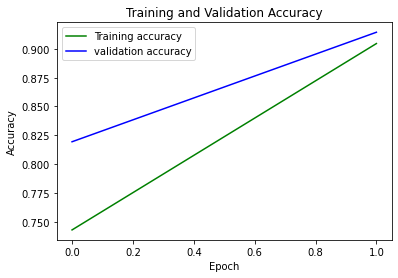

In [ ]:
#Accuracy Plot
accry = history.history['accuracy']
validation_accry = history.history['val_accuracy']
plt.plot(accry, 'g', label='Training accuracy')
plt.plot(validation_accry , 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

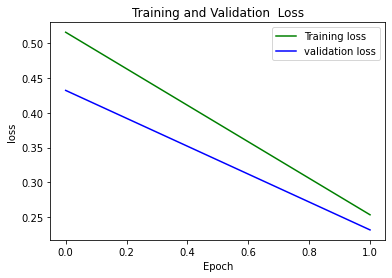

In [ ]:
#Loss Plot
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, 'g', label='Training loss')
plt.plot(validation_loss , 'b', label='validation loss')
plt.title('Training and Validation  Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()